In [24]:
pip install matplotlib==3.1.0

Note: you may need to restart the kernel to use updated packages.


Data Fields Provided

datetime - hourly date + timestamp
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather -
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import (r2_score,explained_variance_score,max_error,mean_absolute_error,
mean_squared_error,mean_squared_log_error,median_absolute_error)
import seaborn as sns
import calendar 
from datetime import date, datetime
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# to make this notebook's output stable across runs
np.random.seed(123)

In [26]:
train=pd.read_csv('C:/Users/Haixiang/Desktop/bike-sharing-demand/train.csv')
test=pd.read_csv('C:/Users/Haixiang/Desktop/bike-sharing-demand/test.csv')

In [27]:
train.shape

(10886, 12)

In [28]:
test.shape

(6493, 9)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [31]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [32]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [33]:
season_dict = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
holiday_dict = {0:"non-holiday",1:"hoiday"}
train['season'] = train['season'].map(season_dict)

#weather_dict = {1: 'Clear + Few clouds + Partly cloudy + Partly cloudy', 2 : 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3 : 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' , 4 :' Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
#拆分datetime列数据
train['date'] = train['datetime'].apply(lambda x : x.split(' ')[0])
train['hour'] = train['datetime'].apply(lambda x : x.split(' ')[1].split(':')[0])
train['weekday'] = train['datetime'].apply(lambda x : calendar.day_name[datetime.strptime(x.split(' ')[0], '%Y-%m-%d').weekday()])
train['month'] = train['datetime'].apply(lambda x : calendar.month_name[datetime.strptime(x.split(' ')[0], '%Y-%m-%d').month])
train.drop('datetime',axis=1,inplace=True)#删去datetime列

In [34]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,Spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,Spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,Spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,Spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [35]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


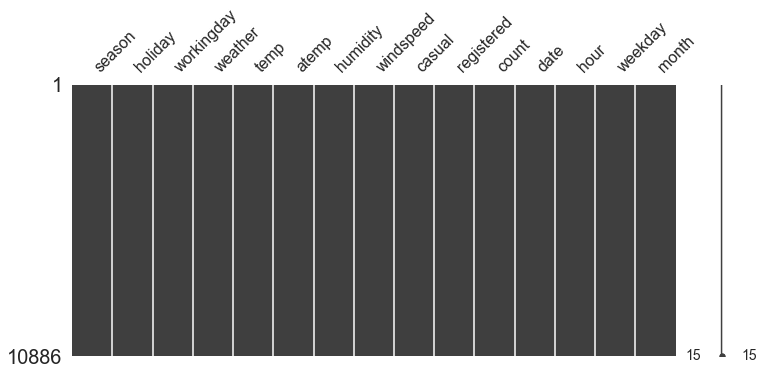

In [36]:
import missingno as msno
msno.matrix(train,figsize=(12,5))

In [37]:
correlation=train.corr()
correlation

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
holiday,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


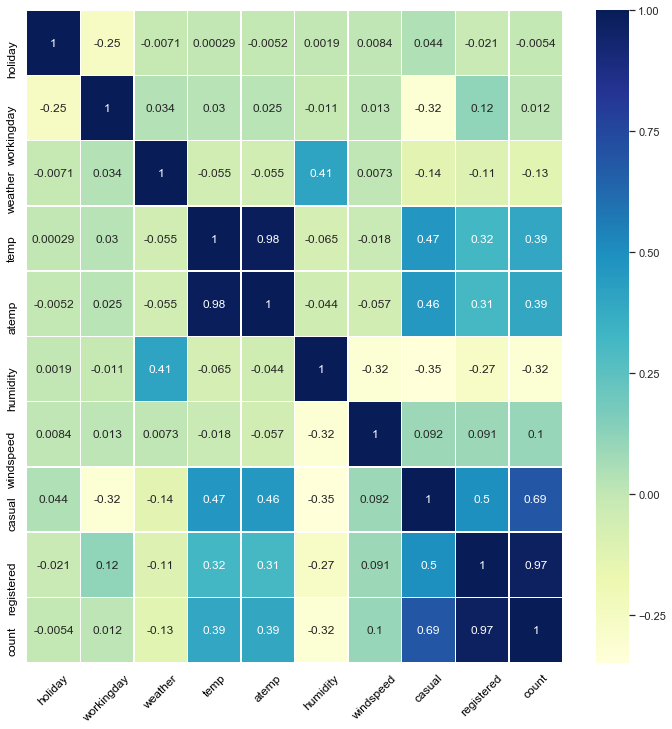

In [38]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(1,1,1)
sns.set(style='dark')
sns.heatmap(correlation,ax=ax1,vmax=1,square=False,annot=True,cmap='YlGnBu',linewidths=.5)
#plt.title('Heatmap on Correlation',fontsize=30,color='black')
plt.xticks(fontsize=12,color='black',rotation=45)
plt.yticks(fontsize=12,color='black')
plt.show()

分析
count：

与温度成正相关，说明温度升高总产量也增加
与湿度成反相关，说明湿度较大时人们不愿骑车
与小时成正相关，说明一天中租车量与时间有线性关系；
温湿度等因素与季节月份相关，需进一步可视化分析各特征对count的影响

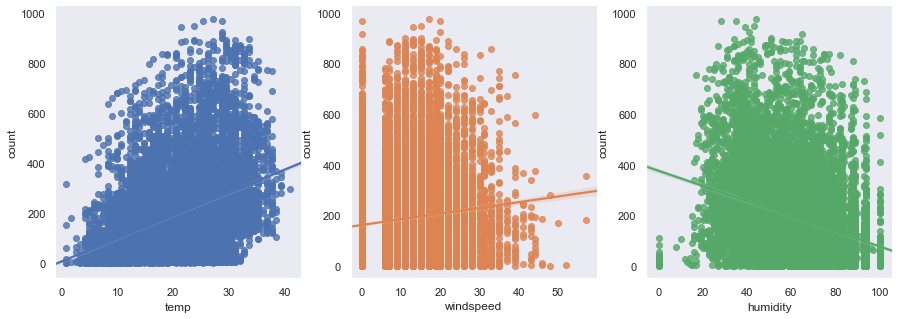

In [39]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(15, 5)
sns.set(style='whitegrid')
sns.despine()
ax1=sns.regplot(x="temp", y="count", data=train,ax=ax1)
ax2=sns.regplot(x="windspeed", y="count", data=train,ax=ax2)
ax3=sns.regplot(x="humidity", y="count", data=train,ax=ax3)


气温低于10，高于30度，租车人数较少-太冷太热都会抑制租车需求
风速越大，租车人数越少-大风抑制租车需求
空气湿度越高，租车人数越少-干爽的天气骑车比较舒适

In [40]:
hourcountAvg=train.pivot_table(index=['hour'],columns=['season'],values=['count'])
hourcountAvg.head()

count                                 
season       Fall     Spring     Summer     Winter
hour                                              
00      75.675439  28.292035  58.473684  57.877193
01      44.831858  18.761062  35.640351  36.166667
02      31.707965  13.205607  23.482456  22.684211
03      15.778761   7.760417  11.714286  11.169643
04       8.087719   3.336634   6.628319   7.228070

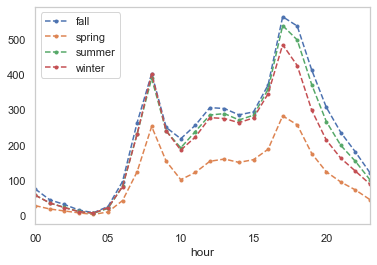

In [41]:
hourcountAvg.plot(linestyle='dashed', marker='.')
plt.grid()
plt.legend(['fall','spring','summer','winter'])

In [42]:
hourseasonAggregated = pd.DataFrame(train.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
hourseasonAggregated.head()

,hour,season,count
0,00,Fall,75.675439
1,00,Spring,28.292035
2,00,Summer,58.473684
3,00,Winter,57.877193
4,01,Fall,44.831858


[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

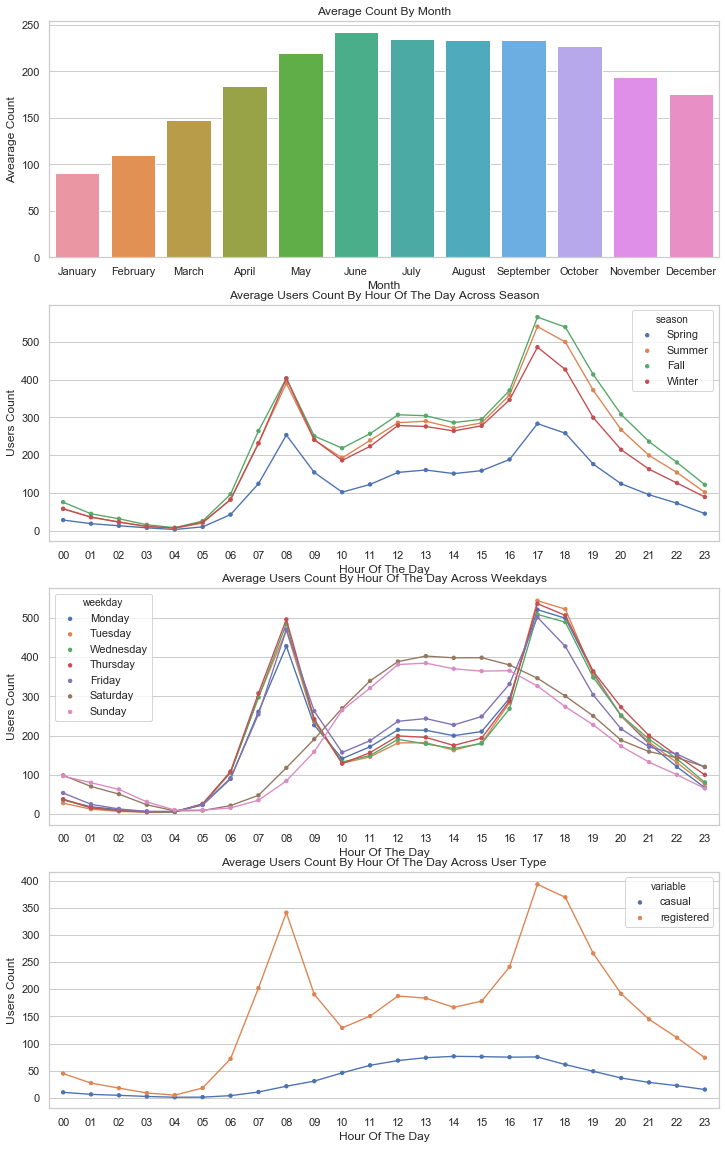

In [50]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
monthDict = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
weekDict = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
#月平均租车量
monthAggregated = pd.DataFrame(train.groupby("month")["count"].mean()).reset_index()
monthAggregated["month_word"]=monthAggregated["month"].map(monthDict)
order_month = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.barplot(data=monthAggregated,x="month",y="count",ax=ax1,order=order_month)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")


#不同季节每天的平均租车量
hourseasonAggregated = pd.DataFrame(train.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
order_season = ['Spring', 'Summer', 'Fall', 'Winter']
sns.pointplot(x=hourseasonAggregated["hour"], y=hourseasonAggregated["count"],hue=hourseasonAggregated["season"], hue_order=order_season, data=hourseasonAggregated, join=True,ax=ax2, scale=0.5)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

#每星期每天平均租车量
hourweekAggregated = pd.DataFrame(train.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
hourweekAggregated["weekday_word"]=hourweekAggregated["weekday"].map(weekDict)
order_weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.pointplot(x=hourweekAggregated["hour"], y=hourweekAggregated["count"],hue=hourweekAggregated["weekday"], hue_order=order_weekday, scale=0.5, data=hourweekAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

#每天租车的不同用户类型
hourTransformed = pd.melt(train[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
houruserAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=houruserAggregated["hour"], y=houruserAggregated["value"],hue=houruserAggregated["variable"],hue_order=["casual","registered"], scale=0.5, data=houruserAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

#按照日、月、季节分析数据变化
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
count_by_weekday = pd.DataFrame(train.groupby(by=['weekday', 'hour'])['count'].mean()).reset_index()
order_weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.pointplot(data=count_by_weekday, x='hour', y='count', hue='weekday',hue_order=order_weekday, ax=ax)
ax.set(xlabel='hour', ylabel='count', title='count by 24h')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
count_by_month = pd.DataFrame(train.groupby(by=['month'])['count'].mean()).reset_index()
order_month = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.barplot(data=count_by_month, x='month', y='count', ax=ax, order=order_month)
ax.set(xlabel='month', ylabel='count', title='count per month')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
count_by_season = pd.DataFrame(train.groupby(by=['season', 'hour'])['count'].mean()).reset_index()
order_season = ['Spring', 'Summer', 'Fall', 'Winter']
sns.pointplot(data=count_by_season, x='hour', y='count', hue='season', hue_order=order_season, scale=0.5, ax=ax)
ax.set(xlabel='hour', ylabel='count', title='Avr count for season')
plt.show()

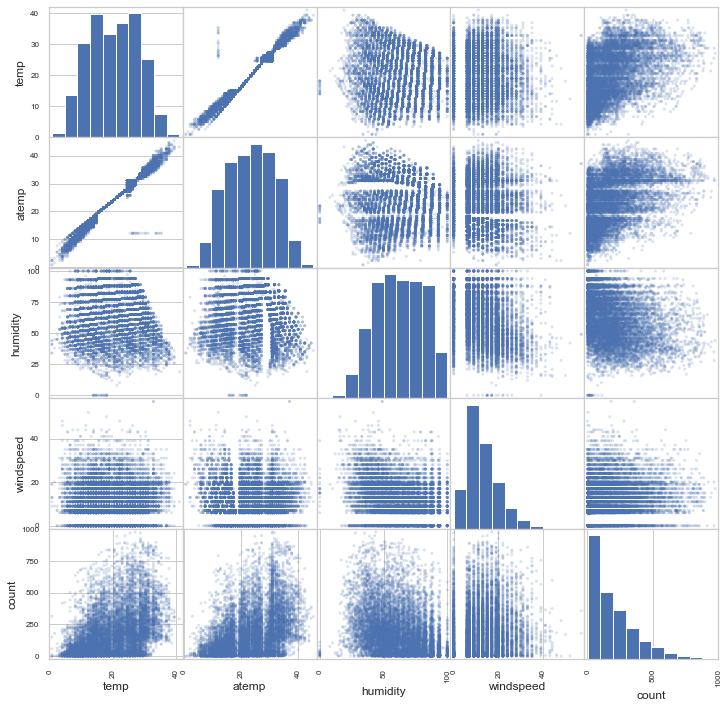

In [51]:
from pandas.plotting import scatter_matrix
scatter_matrix(train[['temp','atemp','humidity','windspeed','count']], alpha=0.2, figsize=(12, 12))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A79B00C550>,
      dtype=object)

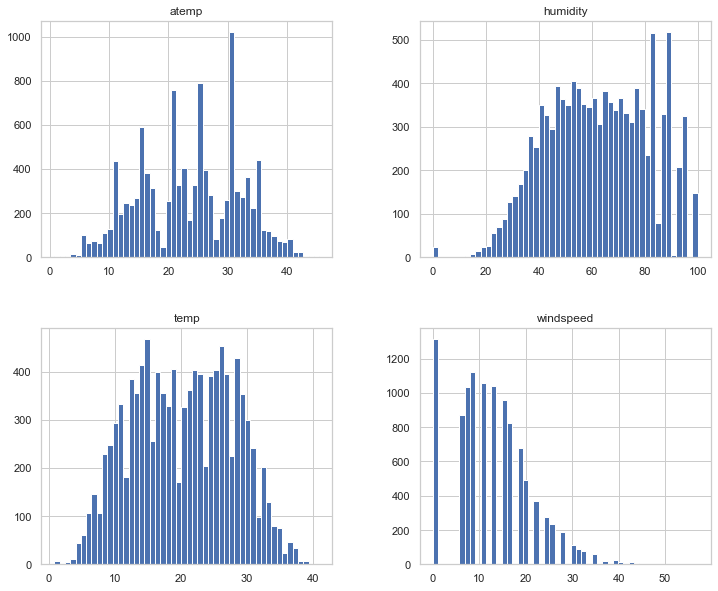

In [52]:
train[['temp','atemp','humidity','windspeed']].hist(bins=50,figsize=(12,10))

Windspeed: Higher windspeed drives lower demand for bike as shown by the graph.
temp (Normalized temperature in Celsius) and atemp(Normalized feeling temperature in Celsius) are showing normal distribution curve.
humidity: interestingly higher humidity encouraged more bikers to bike.

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
season        10886 non-null object
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null object
weekday       10886 non-null object
month         10886 non-null object
dtypes: float64(3), int64(7), object(5)
memory usage: 1.2+ MB


In [54]:
train['weekday'].value_counts(sort=False)

Thursday     1553
Wednesday    1551
Friday       1529
Monday       1551
Sunday       1579
Saturday     1584
Tuesday      1539
Name: weekday, dtype: int64